## data generator 이용
- 목적: 데이터를 풍성하게 만들기

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets
from tensorflow.keras import layers

In [2]:
def mymodel(input_shape, num_classes):
    inputs= layers.Input(shape=input_shape)

    #cnn의 역할: feature extraction, feature map을 만들어주는 역할 
    net = layers.Conv2D(32,3,1,padding='SAME')(inputs)
    net = layers.Activation('relu')(net)
    net = layers.Conv2D(32,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Conv2D(64,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.Conv2D(64,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Flatten()(net) #2D->1D
    net = layers.Dense(512)(net)
    net = layers.Activation('relu')(net)
    net = layers.Dropout(0.25)(net)
#     net = layers.Dense(128)(net)
#     net = layers.Activation('relu')(net)
    net = layers.Dense(num_classes)(net)
    net = layers.Activation('softmax')(net)

    model = tf.keras.Model(inputs=inputs, outputs= net, name='test')
    return model

In [3]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [4]:
train_x_4d = train_x[...,tf.newaxis]
test_x_4d = test_x[..., tf.newaxis]

In [5]:
train_x_4d.shape, test_x_4d.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
input_shape=(28,28,1)
num_classes=10
model= mymodel(input_shape, num_classes)

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### data generator를 위한 모듈 import

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_data_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

In [11]:
batch_size=32
train_generator = train_data_gen.flow(train_x_4d, train_y, batch_size=batch_size, shuffle =True)
test_generator = test_data_gen.flow(test_x_4d, test_y, batch_size=batch_size)

In [13]:
len(train_generator), len(test_generator), 60000//batch_size, 10000//batch_size

(1875, 313, 1875, 312)

In [33]:
num_epochs=1
hist= model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=num_epochs, validation_data=test_generator, validation_steps=len(test_generator))

1875/1875 [==============================] - 441s 235ms/step - loss: 0.1121 - accuracy: 0.9653 - val_loss: 0.0361 - val_accuracy: 0.9876


In [35]:
output=model.evaluate(test_x_4d, test_y) #값이 다른 이유 

313/313 [==============================] - 13s 41ms/step - loss: 5.9515 - accuracy: 0.9852


In [36]:
test_x_4d_norm = test_x_4d/255

In [37]:
np.max(test_x_4d_norm)

1.0

In [38]:
output=model.evaluate(test_x_4d, test_y)

313/313 [==============================] - 12s 39ms/step - loss: 5.9515 - accuracy: 0.9852


In [17]:
pred = model.predict(test_x_4d[0].reshape(1,28,28,1))
pred, np.argmax(pred), test_y[0]

(array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32), 7, 7)

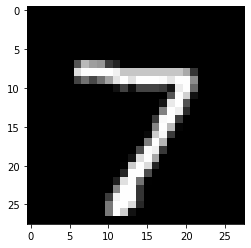

In [18]:
plt.imshow(np.squeeze(test_x_4d[0]), 'gray')
plt.show()

In [19]:
input = train_x_4d[0]
input.shape

(28, 28, 1)

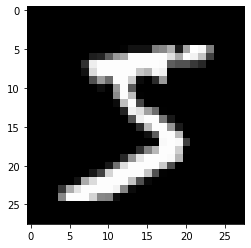

In [20]:
plt.imshow(np.squeeze(train_x_4d[0]), 'gray')
plt.show()

In [27]:
img = next(iter(train_data_gen.flow(input.reshape(1,28,28,1))))

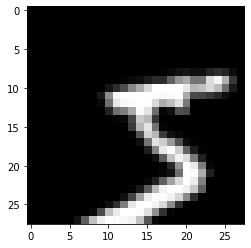

In [28]:
plt.imshow(np.squeeze(img), 'gray')
plt.colorbar()
plt.show()

In [29]:
input = input[tf.newaxis,...]
input.shape

(1, 28, 28, 1)

In [32]:
index = 0
for img in train_data_gen.flow(input):
    print(img.shape, index)
    index+=1
    if index>10:
        break 

(1, 28, 28, 1) 0
(1, 28, 28, 1) 1
(1, 28, 28, 1) 2
(1, 28, 28, 1) 3
(1, 28, 28, 1) 4
(1, 28, 28, 1) 5
(1, 28, 28, 1) 6
(1, 28, 28, 1) 7
(1, 28, 28, 1) 8
(1, 28, 28, 1) 9
(1, 28, 28, 1) 10


## 디렉토리에서 영상읽어 data generator 이용하기

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

In [40]:
batch_size=32
train_dir='./dataset/mnist_png/training'
test_dir='./dataset/mnist_png/testing'
train_generator = train_data_gen.flow_from_directory(train_dir , batch_size=batch_size, shuffle =True, 
                                                     target_size=(28,28), color_mode='grayscale', class_mode='categorical') #categorical 사용해야함
test_generator = test_data_gen.flow_from_directory(test_dir, batch_size=batch_size,
                                                   target_size=(28,28), color_mode='grayscale', class_mode='categorical')

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
num_epochs=1
hist= model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=num_epochs, 
                          validation_data=test_generator, 
                          validation_steps=len(test_generator)
                         )

1875/1875 [==============================] - 583s 311ms/step - loss: 0.0921 - accuracy: 0.9726 - val_loss: 0.0234 - val_accuracy: 0.9922


In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
test_x_4d_norm = test_x_4d/255
model.evaluate(test_x_4d_norm, test_y)

313/313 [==============================] - 13s 41ms/step - loss: 0.0234 - accuracy: 0.9922


[0.02339896745979786, 0.9922000169754028]